In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

In [2]:
start = '2010-01-01'
end = '2023-12-31'
yf.pdr_override()
df = pdr.get_data_yahoo('AAPL', start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490199,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375156,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [3]:
df.tail

<bound method NDFrame.tail of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04    7.622500    7.660714    7.585000    7.643214    6.478998   
2010-01-05    7.664286    7.699643    7.616071    7.656429    6.490199   
2010-01-06    7.656429    7.686786    7.526786    7.534643    6.386965   
2010-01-07    7.562500    7.571429    7.466071    7.520714    6.375156   
2010-01-08    7.510714    7.571429    7.466429    7.570714    6.417541   
...                ...         ...         ...         ...         ...   
2023-12-22  195.179993  195.410004  192.970001  193.600006  193.600006   
2023-12-26  193.610001  193.889999  192.830002  193.050003  193.050003   
2023-12-27  192.490005  193.500000  191.089996  193.149994  193.149994   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.580002   
2023-12-29  193.899994  194.399994  191.729996  192.529999  192.529999   

       

In [4]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490199,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375156,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [5]:
df=df.drop(['Date','Adj Close'] ,axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


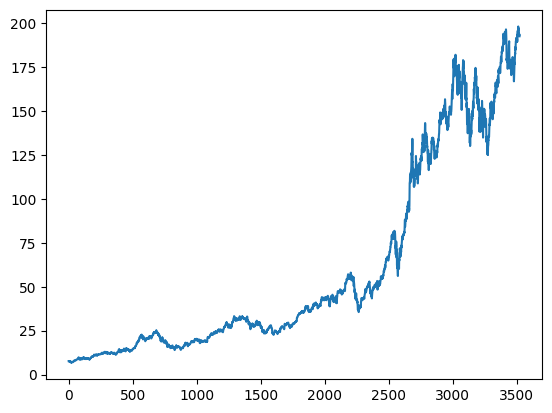

In [6]:
plt.plot(df.Close)

In [7]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3517,195.179993,195.410004,192.970001,193.600006,37122800
3518,193.610001,193.889999,192.830002,193.050003,28919300
3519,192.490005,193.500000,191.089996,193.149994,48087700
3520,194.139999,194.660004,193.169998,193.580002,34049900


In [8]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3517    181.768301
3518    181.787101
3519    181.898701
3520    182.046001
3521    182.173301
Name: Close, Length: 3522, dtype: float64

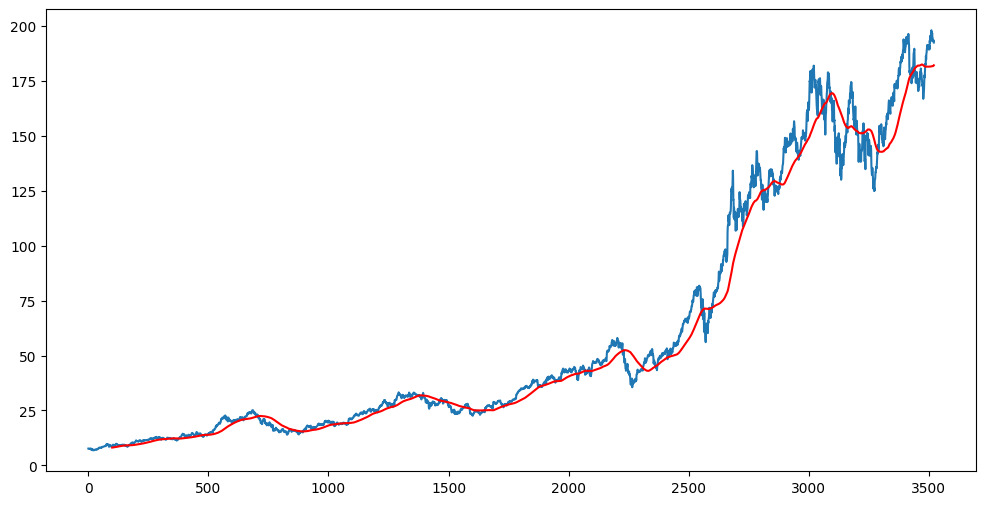

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100 ,'r')

In [10]:
ma200=df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3517    178.649100
3518    178.871851
3519    179.085250
3520    179.290201
3521    179.487900
Name: Close, Length: 3522, dtype: float64

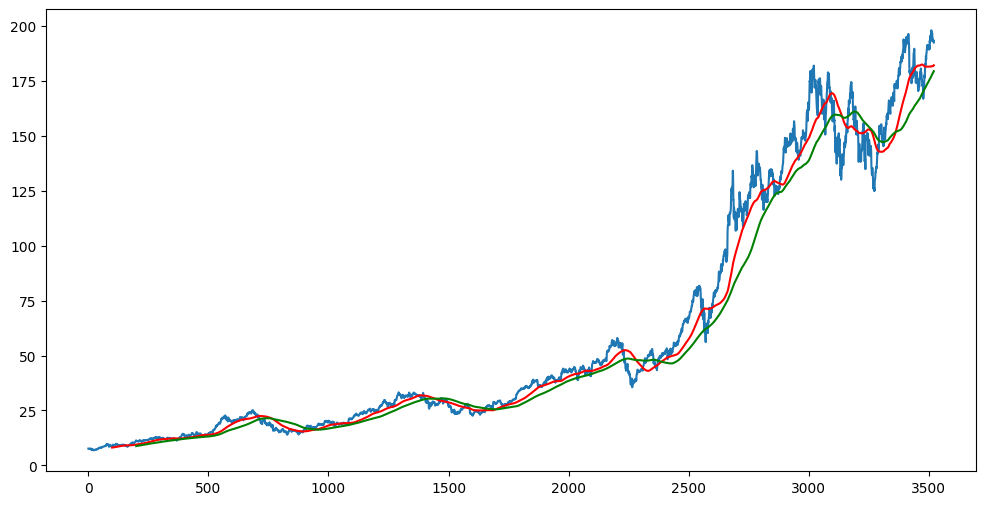

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100 ,'r')
plt.plot(ma200 ,'g')

In [12]:
df.shape

(3522, 5)

In [13]:
#Split Data
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_train.shape)
print(data_test.shape)

(2465, 1)
(1057, 1)


In [14]:
data_train.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [15]:
data_test.head()

,Close
2465,59.102501
2466,60.127499
2467,59.990002
2468,60.794998
2469,60.895000


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [17]:
data_train_array=scaler.fit_transform(data_train)
data_train_array

array([[0.01502647],
       [0.01527965],
       [0.01294631],
       ...,
       [0.99573703],
       [0.9911866 ],
       [0.99554539]])

In [18]:
data_train_array.shape

(2465, 1)

In [19]:
x_train=[]
y_train=[]

for i in range(100,data_train_array.shape[0]):
    x_train.append(data_train_array[i-100])
    y_train.append(data_train_array[i, 0])


x_train, y_train=np.array(x_train), np.array(y_train)

In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model =Sequential()
model.add(LSTM(units=50, activation= 'relu', return_sequences= True, 
               input_shape= (x_train.shape[1] ,1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation= 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation= 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 60)             26640     
                                                                 
 dropout_1 (Dropout)         (None, 1, 60)             0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 80)             45120     
                                                                 
 dropout_2 (Dropout)         (None, 1, 80)             0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)


Epoch 1/50

74/74 [==============================] - 4s 3ms/step - loss: 0.1248
Epoch 2/50
74/74 [==============================] - 0s 3ms/step - loss: 0.0439
Epoch 3/50
74/74 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 4/50
74/74 [==============================] - 0s 3ms/step - loss: 0.0196
Epoch 5/50
74/74 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 6/50
74/74 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 7/50
74/74 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 8/50
74/74 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 9/50
74/74 [==============================] - 0s 3ms/step - loss: 0.0142
Epoch 10/50
74/74 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 11/50
74/74 [==============================] - 0s 3ms/step - loss: 0.0143
Epoch 12/50
74/74 [==============================] - 0s 3ms/step - loss: 0.0136
Epoch 13/50
74/74 [============================

In [24]:
model.save('keras_model.h5')

C:\Users\SOUMIK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
data_test.head()

,Close
2465,59.102501
2466,60.127499
2467,59.990002
2468,60.794998
2469,60.895000


In [26]:
data_train.tail(100)

,Close
2365,44.345001
2366,44.575001
2367,43.767502
2368,43.325001
2369,44.910000
...,...
2460,59.052502
2461,58.967499
2462,58.830002
2463,58.592499


In [27]:
past100day=data_train.tail(100)

In [28]:
final_df= pd.concat([past100day,data_test], ignore_index=True)

In [29]:
final_df.head()

,Close
0,44.345001
1,44.575001
2,43.767502
3,43.325001
4,44.910000


In [30]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.00658979],
       [0.00807572],
       [0.00285881],
       ...,
       [0.96795551],
       [0.97073361],
       [0.96394998]])

In [31]:
input_data.shape

(1157, 1)

In [32]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-1: i])
    y_test.append(input_data[i, 0])
    

In [33]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1057, 1, 1)
(1057,)


In [34]:
# Predictions :

y_predicted = model.predict(x_test)


34/34 [==============================] - 0s 1ms/step


In [35]:
y_predicted.shape

(1057, 1)

In [36]:
y_test

array([0.10193171, 0.10855379, 0.10766548, ..., 0.96795551, 0.97073361,
       0.96394998])

In [37]:
y_predicted

array([[0.12016087],
       [0.12164811],
       [0.12767184],
       ...,
       [0.76235324],
       [0.76181203],
       [0.7594705 ]], dtype=float32)

In [38]:
scaler.scale_

array([0.00646057])

In [39]:
scale_factor = 1/0.02123255
y_predicted =y_predicted * scale_factor
y_test = y_test * scale_factor

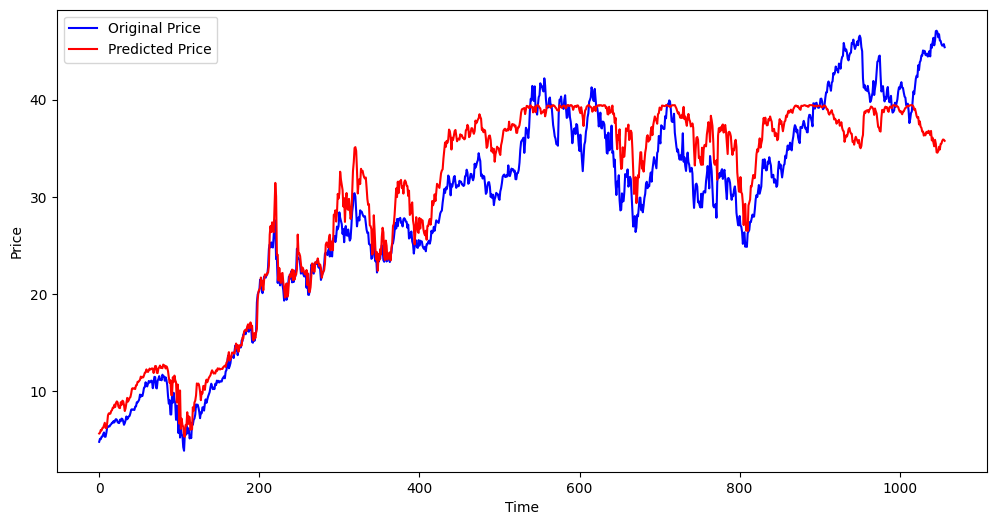

In [40]:
plt.figure(figsize=(12,6))
plt.plot(y_test , 'b' , label='Original Price' )
plt.plot(y_predicted , 'r',  label='Predicted Price' )
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()